## Imports

In [44]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Data Load

In [45]:
col_labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Species']

df = pd.read_csv('iris.data', names=col_labels)

df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


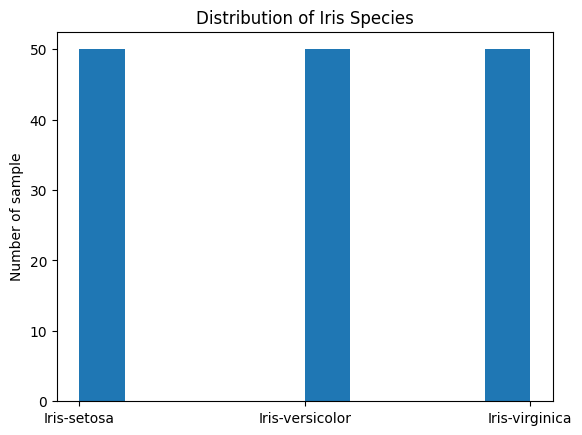

In [46]:
plt.hist(df['Species'])
plt.title('Distribution of Iris Species')
plt.ylabel('Number of sample')
plt.show()

## PrePreocess

In [47]:
X = df.drop(['Species'], axis=1)
y = df['Species']

encoder =  LabelEncoder()
Y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

## Model

In [48]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape = (4), name = "Input") # Dataset is composed of 4 features, so input shape has a size of 4

dense1 = Dense(units = 10, activation = "tanh", name = "Dense_1")
dense2 = Dense(units = 8, activation = "tanh", name = "Dense_2")
dense3 = Dense(units = 6, activation = "tanh", name = "Dense_3")
dense4 = Dense(units = 3, activation = "softmax", name = "Dense_4") # Target has 3 classes, so last layer is composed of 3 neurons

x = dense1(inputs)
x = dense2(x)
x = dense3(x)
outputs = dense4(x)

model = Model(inputs = inputs, outputs = outputs)
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 4)]               0         
                                                                 
 Dense_1 (Dense)             (None, 10)                50        
                                                                 
 Dense_2 (Dense)             (None, 8)                 88        
                                                                 
 Dense_3 (Dense)             (None, 6)                 54        
                                                                 
 Dense_4 (Dense)             (None, 3)                 21        
                                                                 
Total params: 213 (852.00 Byte)
Trainable params: 213 (852.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

## Training

In [50]:
model_history = model.fit(X_train,
						  y_train,
						  epochs=500,
						  batch_size=32,
						  validation_split=0.1)



Epoch 1/500
3/3 [==============================] - 0s 44ms/step - loss: 1.1312 - accuracy: 0.3085 - val_loss: 1.1185 - val_accuracy: 0.4545
Epoch 2/500
3/3 [==============================] - 0s 8ms/step - loss: 1.1243 - accuracy: 0.3085 - val_loss: 1.1305 - val_accuracy: 0.2727
Epoch 3/500
3/3 [==============================] - 0s 8ms/step - loss: 1.1175 - accuracy: 0.4043 - val_loss: 1.1429 - val_accuracy: 0.0909
Epoch 4/500
3/3 [==============================] - 0s 8ms/step - loss: 1.1112 - accuracy: 0.3723 - val_loss: 1.1475 - val_accuracy: 0.0909
Epoch 5/500
3/3 [==============================] - 0s 8ms/step - loss: 1.1090 - accuracy: 0.3723 - val_loss: 1.1544 - val_accuracy: 0.0909
Epoch 6/500
3/3 [==============================] - 0s 8ms/step - loss: 1.1051 - accuracy: 0.3723 - val_loss: 1.1560 - val_accuracy: 0.0909
Epoch 7/500
3/3 [==============================] - 0s 8ms/step - loss: 1.1026 - accuracy: 0.3723 - val_loss: 1.1570 - val_accuracy: 0.0909
Epoch 8/500
3/3 [=========

## Training performances


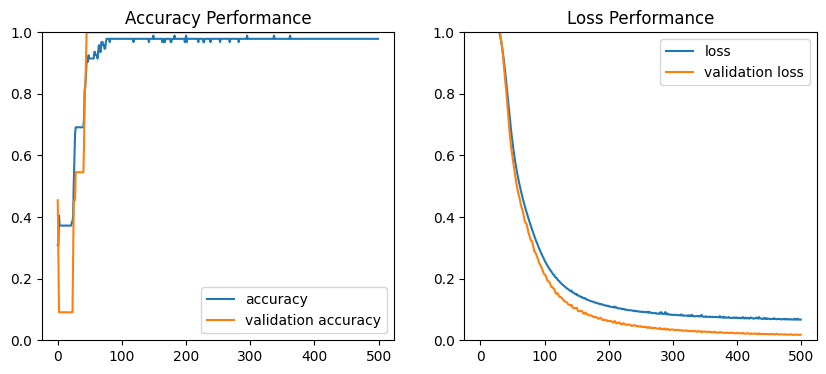

In [51]:
model_accuracy = model_history.history['accuracy']
model_loss = model_history.history['loss']
model_val_loss = model_history.history['val_loss']
model_val_acc = model_history.history['val_accuracy']

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(model_accuracy, label='accuracy')
plt.plot(model_val_acc, label='validation accuracy')
plt.ylim([0,1])
plt.legend()
plt.title('Accuracy Performance')

plt.subplot(122)
plt.plot(model_loss, label='loss')
plt.plot(model_val_loss, label='validation loss')
plt.ylim([0,1])
plt.legend()
plt.title('Loss Performance')
plt.show()

## Prediction

In [62]:
test_pred = model.predict(X_test)
#y_pred = model.predict(X_test)

print('\n','Example of prediction returned, in the form of probability to belong to a class : \n',test_pred[:3])

y_test_class = y_test
y_pred_class = np.argmax(test_pred,axis=1) # We keep only the class with the highest probability

print('\n','Prediction reworked, to keep the most probable class only: \n',y_pred_class[:3])

2/2 [==============================] - 0s 2ms/step

 Example of prediction returned, in the form of probaility to belong to a class : 
 [[9.87706125e-01 1.21076135e-02 1.86228324e-04]
 [3.18855920e-04 2.57628132e-02 9.73918319e-01]
 [9.87468123e-01 1.23443278e-02 1.87529018e-04]]

 Prediction reworked, to keep the most probable class only: 
 [0 2 0]


## Prediction Performance

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

print('Performance report :\n')
print(classification_report(y_test_class,y_pred_class))

print('\n','Classification report : \n')
print(confusion_matrix(y_test_class,y_pred_class))

Performance report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


 Classification report : 

[[15  0  0]
 [ 0 14  0]
 [ 0  0 16]]
